In [231]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import openpyxl
from wordcloud import WordCloud

In [254]:
df = pd.read_excel('UNESCO Technology Baseline Assesment.xlsx', engine='openpyxl')
df.head()

,1. Name,2. Age,3. Gender,4. Contact,5. Name of School,6. Current Grade Level,7. Region of School,8. Do you have access to a device for online Learning?,"If yes, what type of device do you use?",9. How comfortable are you with using digital devices for Learning?,...,13. Have you used an online learning platform before?,"If yes, please specify",14. What is your level of experience with online/remote learning platforms?,15. What are the main challenges you have faced (or expect to face) with online learning?,"If others, please specify",16. What kind of support would you find most helpful in transitioning to technology-enabled learning?,"If others, please specify_1",17. Have you heard about the TeOSS project before?,"If yes, what do you know about the TeOSS project?",18. What are your expectations for the TeOSS Learners Training Program?
0,HENRY ACQUAH,39.0,Male,0244980226,ELMINA METHODIST JHS,JHS 3,NaN,Yes,Laptop,NaN,...,Yes,NaN,NaN,Lack of access to reliable internet/devices,NaN,Access to technical support and troubleshooting,NaN,Yes,"The project, designed to integrate technology ...",NaN
1,Samuel,29.0,Male,0551663447,T. I AHMADDIYAH,Primary 4,NaN,Yes,Smartphone,NaN,...,No,NaN,NaN,Lack of access to reliable internet/devices,NaN,Tips for staying engaged and motivated in remo...,NaN,Yes,Helping teachers to know about online education,NaN
2,Damaris Achiaa Boateng,8.0,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Emmanuellla Tofah,45.0,Female,0246268839,"No.1 Basic School, Akatsi",JHS 1,Volta,Yes,Laptop,Moderate,...,No,NaN,Some experience,Lack of access to reliable internet/devices,NaN,Training on how to use online learning platforms,NaN,No,NaN,It will enable me use online learning platform...
4,JEREMIAH OBENG ESSOAH,11.0,Male,NaN,ENCHI CATHOLIC BASIC SCHOOL,JHS 2,NaN,No,NaN,NaN,...,No,NaN,NaN,Lack of access to reliable internet/devices,NaN,Training on how to use online learning platforms,NaN,Yes,NaN,NaN


In [255]:
df.columns

Index(['1. Name', '2. Age', '3. Gender', '4. Contact', '5. Name of School',
       '6. Current Grade Level', '7. Region of School',
       '8. Do you have access to a device for online Learning?',
       'If yes, what type of device do you use?',
       '9. How comfortable are you with using digital devices for Learning?',
       '10. Do you have internet access?',
       ' If yes, what type of internet access do you use?', 'Others specify',
       '11. How comfortable are you using the internet to access information?',
       '12.What is your preferred learning style?',
       '13. Have you used an online learning platform before? ',
       'If yes, please specify',
       '14. What is your level of experience with online/remote learning platforms?',
       '15. What are the main challenges you have faced (or expect to face) with online learning?',
       'If others, please specify',
       '16. What kind of support would you find most helpful in transitioning to technology-enabled le

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2682 entries, 0 to 2681
Data columns (total 25 columns):
 #   Column                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                 --------------  -----  
 0   1. Name                                                                                                2657 non-null   object 
 1   2. Age                                                                                                 2620 non-null   float64
 2   3. Gender                                                                                              2585 non-null   object 
 3   4. Contact                                                                                             1764 non-null   object 
 4   5. Name of School                                                                               

In [17]:
df["2. Age"] = df["2. Age"].fillna(value=0)

In [18]:
df["2. Age"] = df["2. Age"].astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2682 entries, 0 to 2681
Data columns (total 25 columns):
 #   Column                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                 --------------  ----- 
 0   1. Name                                                                                                2657 non-null   object
 1   2. Age                                                                                                 2682 non-null   int64 
 2   3. Gender                                                                                              2585 non-null   object
 3   4. Contact                                                                                             1764 non-null   object
 4   5. Name of School                                                                                     

In [20]:
df["2. Age"].unique()

array([39, 29,  8, 45, 11, 14, 13, 15, 12, 16, 34, 10,  9,  6,  7, 19,  0,
       17, 18, 20, 22, 26, 46, 31, 23,  5, 38, 21,  1, 50, 30, 27])

In [22]:
df.describe()

,2. Age
count,2682.000000
mean,12.075317
std,3.542926
min,0.000000
25%,11.000000
50%,12.000000
75%,14.000000
max,50.000000


In [29]:
age_count = df["2. Age"].count()
print(age_count)

2682


In [32]:
avg_age = df["2. Age"].value_counts()
avg_age

2. Age
13    494
14    444
12    378
11    320
15    218
10    212
9     155
8     101
16     90
7      64
0      62
6      45
17     31
18     18
19     13
20      6
22      6
5       5
21      3
34      2
23      2
1       2
26      2
29      1
39      1
45      1
31      1
46      1
38      1
50      1
30      1
27      1
Name: count, dtype: int64

In [34]:
df.isna().sum()

1. Name                                                                                                    25
2. Age                                                                                                      0
3. Gender                                                                                                  97
4. Contact                                                                                                918
5. Name of School                                                                                          71
6. Current Grade Level                                                                                    107
7. Region of School                                                                                        77
8. Do you have access to a device for online Learning?                                                     73
If yes, what type of device do you use?                                                                  1687
9. How com

In [36]:
df["1. Name"] = df['1. Name'].fillna('No Name Entered')
df["1. Name"].isna().sum()

np.int64(0)

In [38]:
df.isna().sum()

1. Name                                                                                                     0
2. Age                                                                                                      0
3. Gender                                                                                                  97
4. Contact                                                                                                918
5. Name of School                                                                                          71
6. Current Grade Level                                                                                    107
7. Region of School                                                                                        77
8. Do you have access to a device for online Learning?                                                     73
If yes, what type of device do you use?                                                                  1687
9. How com

In [40]:
df["3. Gender"] = df['3. Gender'].fillna('No answer')

In [43]:
df["4. Contact"] = df['4. Contact'].fillna('No contact')

In [44]:
df["5. Name of School"] = df['5. Name of School'].fillna('No name of school')

In [45]:
df["6. Current Grade Level"] = df['6. Current Grade Level'].fillna('No Current Grade Level')

In [46]:
df["7. Region of School"] = df['7. Region of School'].fillna('No Region of School')

In [47]:
df["8. Do you have access to a device for online Learning?"] = df['8. Do you have access to a device for online Learning?'].fillna('No Answer')

In [48]:
df["If yes, what type of device do you use?"] = df['If yes, what type of device do you use?'].fillna('No Answer')

In [49]:
df["Others specify"] = df['Others specify'].fillna('No Answer Specified')

In [50]:
df["11. How comfortable are you using the internet to access information?"] = df['11. How comfortable are you using the internet to access information?'].fillna('No Answer')

In [51]:
df["12.What is your preferred learning style?"] = df['12.What is your preferred learning style?'].fillna('No Answer')

In [55]:
df.columns

Index(['1. Name', '2. Age', '3. Gender', '4. Contact', '5. Name of School',
       '6. Current Grade Level', '7. Region of School',
       '8. Do you have access to a device for online Learning?',
       'If yes, what type of device do you use?',
       '9. How comfortable are you with using digital devices for Learning?',
       '10. Do you have internet access?',
       ' If yes, what type of internet access do you use?', 'Others specify',
       '11. How comfortable are you using the internet to access information?',
       '12.What is your preferred learning style?',
       '13. Have you used an online learning platform before? ',
       'If yes, please specify',
       '14. What is your level of experience with online/remote learning platforms?',
       '15. What are the main challenges you have faced (or expect to face) with online learning?',
       'If others, please specify',
       '16. What kind of support would you find most helpful in transitioning to technology-enabled le

In [56]:
df["13. Have you used an online learning platform before? "] = df['13. Have you used an online learning platform before? '].fillna('No Answer')

In [57]:
df["If yes, please specify"] = df['If yes, please specify'].fillna('No Answer Specified')

In [58]:
df["14. What is your level of experience with online/remote learning platforms?"] = df['14. What is your level of experience with online/remote learning platforms?'].fillna('No Answer')

In [59]:
df["15. What are the main challenges you have faced (or expect to face) with online learning?"] = df['15. What are the main challenges you have faced (or expect to face) with online learning?'].fillna('No Answer')

In [60]:
df["If others, please specify"] = df['If others, please specify'].fillna('No Answer Specified')

In [61]:
df["16. What kind of support would you find most helpful in transitioning to technology-enabled learning?"] = df['16. What kind of support would you find most helpful in transitioning to technology-enabled learning?'].fillna('No Answer')

In [62]:
df["17. Have you heard about the TeOSS project before?"] = df['17. Have you heard about the TeOSS project before?'].fillna('No Answer')

In [63]:
df["18. What are your expectations for the TeOSS Learners Training Program?"] = df['18. What are your expectations for the TeOSS Learners Training Program?'].fillna('No Answer')

In [66]:
df.isna().sum()

1. Name                                                                                                     0
2. Age                                                                                                      0
3. Gender                                                                                                   0
4. Contact                                                                                                  0
5. Name of School                                                                                           0
6. Current Grade Level                                                                                      0
7. Region of School                                                                                         0
8. Do you have access to a device for online Learning?                                                      0
If yes, what type of device do you use?                                                                     0
9. How com

In [67]:
df.columns

Index(['1. Name', '2. Age', '3. Gender', '4. Contact', '5. Name of School',
       '6. Current Grade Level', '7. Region of School',
       '8. Do you have access to a device for online Learning?',
       'If yes, what type of device do you use?',
       '9. How comfortable are you with using digital devices for Learning?',
       '10. Do you have internet access?',
       ' If yes, what type of internet access do you use?', 'Others specify',
       '11. How comfortable are you using the internet to access information?',
       '12.What is your preferred learning style?',
       '13. Have you used an online learning platform before? ',
       'If yes, please specify',
       '14. What is your level of experience with online/remote learning platforms?',
       '15. What are the main challenges you have faced (or expect to face) with online learning?',
       'If others, please specify',
       '16. What kind of support would you find most helpful in transitioning to technology-enabled le

In [68]:
df["9. How comfortable are you with using digital devices for Learning?"] = df['9. How comfortable are you with using digital devices for Learning?'].fillna('No Answer')

In [69]:
df["10. Do you have internet access?"] = df['10. Do you have internet access?'].fillna('No Answer')

In [71]:
df[" If yes, what type of internet access do you use?"] = df[' If yes, what type of internet access do you use?'].fillna('No Answer')

In [72]:
df["Others specify"] = df['Others specify'].fillna('No Answer')

In [73]:
df.isna().sum()

1. Name                                                                                                     0
2. Age                                                                                                      0
3. Gender                                                                                                   0
4. Contact                                                                                                  0
5. Name of School                                                                                           0
6. Current Grade Level                                                                                      0
7. Region of School                                                                                         0
8. Do you have access to a device for online Learning?                                                      0
If yes, what type of device do you use?                                                                     0
9. How com

In [74]:
df["If others, please specify_1"] = df['If others, please specify_1'].fillna('No Answer')

In [75]:
df["If yes, what do you know about the TeOSS project?"] = df['If yes, what do you know about the TeOSS project?'].fillna('No Answer')

In [77]:
df.isna().sum()

1. Name                                                                                                  0
2. Age                                                                                                   0
3. Gender                                                                                                0
4. Contact                                                                                               0
5. Name of School                                                                                        0
6. Current Grade Level                                                                                   0
7. Region of School                                                                                      0
8. Do you have access to a device for online Learning?                                                   0
If yes, what type of device do you use?                                                                  0
9. How comfortable are you with using

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2682 entries, 0 to 2681
Data columns (total 25 columns):
 #   Column                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                 --------------  ----- 
 0   1. Name                                                                                                2682 non-null   object
 1   2. Age                                                                                                 2682 non-null   int64 
 2   3. Gender                                                                                              2682 non-null   object
 3   4. Contact                                                                                             2682 non-null   object
 4   5. Name of School                                                                                     

In [81]:
df.describe()

,2. Age
count,2682.000000
mean,12.075317
std,3.542926
min,0.000000
25%,11.000000
50%,12.000000
75%,14.000000
max,50.000000


In [83]:
df.rename(columns = {"1. Name":"name", "2. Age":"age", "3. Gender":"gender", "4. Contact":"contact", "5. Name of School":"name of School",
                     "6. Current Grade Level":"current_grade_level", "7. Region of School":"region_of_School","8. Do you have access to a device for online Learning?":"do_you_have_access_to_a_device_for_online_Learning?",
                     "If yes, what type of device do you use?":"if_yes_what_type_of_device_do_you_use?","9. How comfortable are you with using digital devices for Learning?":"how_comfortable_are_you_with_using_digital_devices_for_Learning?",
                     "10. Do you have internet access?":"do_you_have_internet_access?"," If yes, what type of internet access do you use?":"if_yes_what_type_of_internet_access_do_you_use?","11. How comfortable are you using the internet to access information?":"how_comfortable_are_you_using_the_internet_to_access_information?",
                     "12.What is your preferred learning style?":"what_is_your_preferred_learning_style?","13. Have you used an online learning platform before? ":"have_you_used_an_online_learning_platform_before?","If yes, please specify":"if_yes_please_specify",
                     "14. What is your level of experience with online/remote learning platforms?":"what_is_your_level_of_experience_with_online_remote_learning_platforms?","15. What are the main challenges you have faced (or expect to face) with online learning?":"what_are_the_main_challenges_you_have_faced_or_expect_to_face_with_online_learning?",
                     "If others, please specify":"if_others_please_specify","16. What kind of support would you find most helpful in transitioning to technology-enabled learning?":"what_kind_of_support_would_you_find_most_helpful_in_transitioning_to_technology_enabled_learning?",
                     "If others, please specify_1":"if_others_please_specify_1","17. Have you heard about the TeOSS project before?":"have_you_heard_about_the_TeOSS_project_before?","If yes, what do you know about the TeOSS project?":"if_yes_what_do_you_know_about_the_TeOSS_project?",
                     "18. What are your expectations for the TeOSS Learners Training Program?":"what_are_your_expectations_for_the_TeOSS_Learners_Training_Program?",},inplace=True)

In [85]:
df.columns

Index(['name', 'age', 'gender', 'contact', 'name of School',
       'current_grade_level', 'region_of_School',
       'do_you_have_access_to_a_device_for_online_Learning?',
       'if_yes_what_type_of_device_do_you_use?',
       'how_comfortable_are_you_with_using_digital_devices_for_Learning?',
       'do_you_have_internet_access?',
       'if_yes_what_type_of_internet_access_do_you_use?', 'Others specify',
       'how_comfortable_are_you_using_the_internet_to_access_information?',
       'what_is_your_preferred_learning_style?',
       'have_you_used_an_online_learning_platform_before?',
       'if_yes_please_specify',
       'what_is_your_level_of_experience_with_online_remote_learning_platforms?',
       'what_are_the_main_challenges_you_have_faced_or_expect_to_face_with_online_learning?',
       'if_others_please_specify',
       'what_kind_of_support_would_you_find_most_helpful_in_transitioning_to_technology_enabled_learning?',
       'if_others_please_specify_1',
       'have_yo

In [86]:
pip install "notebook>=5.3" "ipywidgets>=7.5"


   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 44.1 MB/s eta 0:00:00


In [116]:
age_counts = df["age"].value_counts()
age_counts

age
13    494
14    444
12    378
11    320
15    218
10    212
9     155
8     101
16     90
7      64
0      62
6      45
17     31
18     18
19     13
20      6
22      6
5       5
21      3
34      2
23      2
1       2
26      2
29      1
39      1
45      1
31      1
46      1
38      1
50      1
30      1
27      1
Name: count, dtype: int64

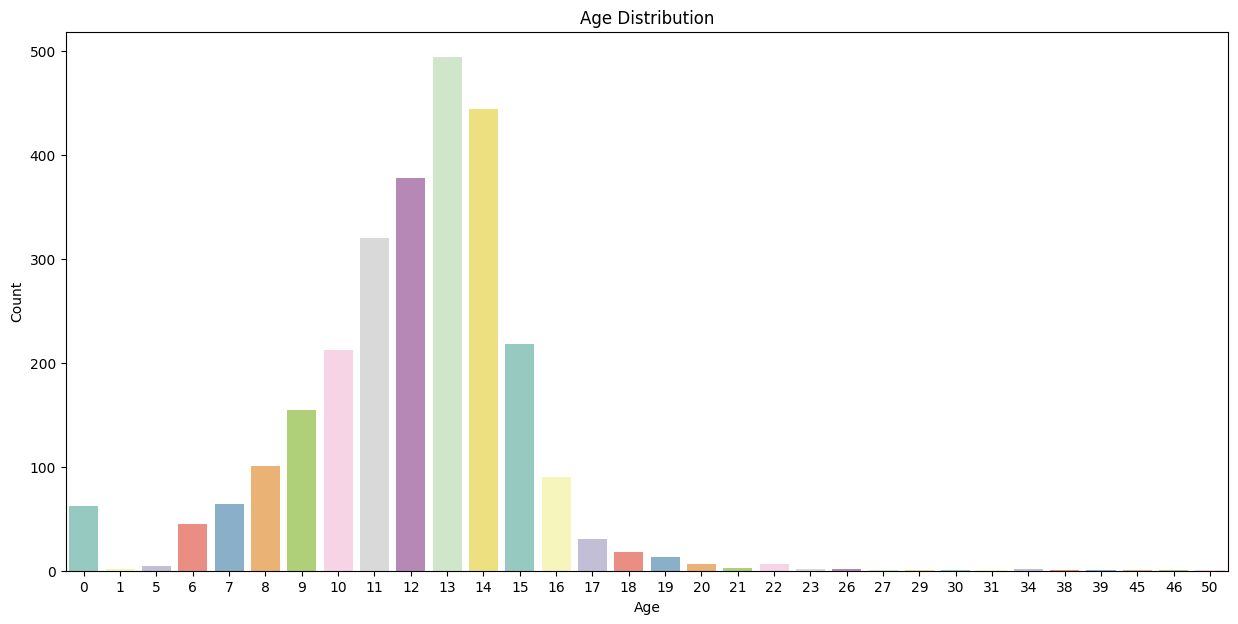

In [117]:

# Create a color palette for better visualization
palette = sns.color_palette("Set3", n_colors=len(age_counts))  # Adjust n_colors if needed

# Create the bar chart with colors and legend
plt.figure(figsize=(15, 7))
sns.barplot(x=age_counts.index, y=age_counts.values,hue=age_counts.index, palette=palette, legend=False)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")

# Save the plot
#plt.savefig("age.png")

# Show the plot
plt.show()

In [253]:
gender_counts = df["gender"].value_counts()
gender_counts

gender
Male         1302
Female       1283
No answer      97
Name: count, dtype: int64

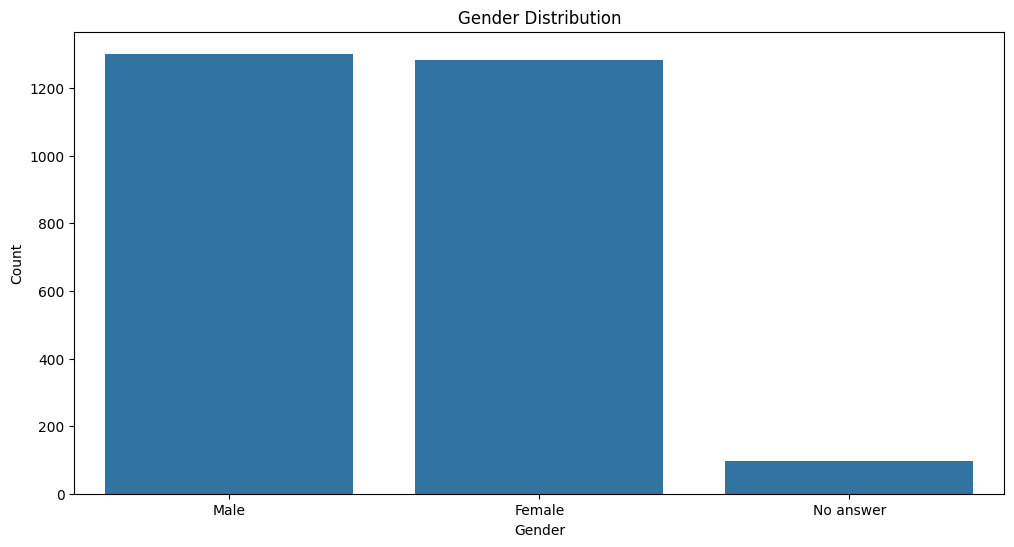

In [133]:

plt.figure(figsize=(12, 6))
sns.barplot(data = gender_counts)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.savefig("gender")
plt.show()

In [135]:
region_counts = df["region_of_School"].value_counts()
region_counts

region_of_School
Central                760
Western                611
Upper West             265
Volta                  242
Northern               240
Upper East             190
Brong Ahafo            153
Eastern                144
No Region of School     77
Name: count, dtype: int64

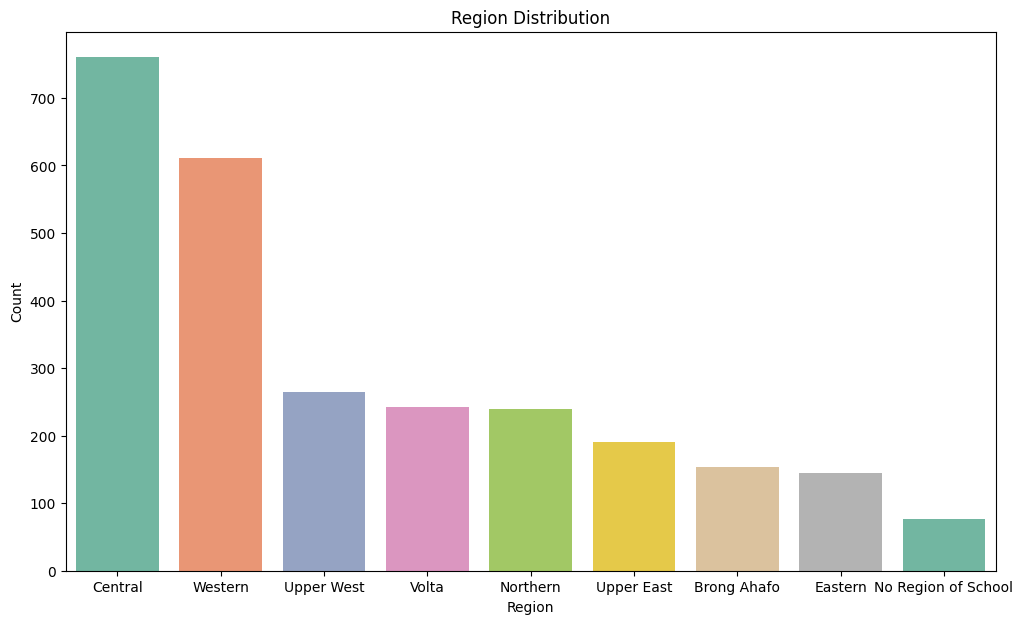

In [142]:
palette = sns.color_palette("Set2",n_colors=len(region_counts))
plt.figure(figsize=(12, 7))
sns.barplot(x=region_counts.index, y=region_counts.values,hue = region_counts.index, palette=palette)
plt.title("Region Distribution")
plt.xlabel("Region")
plt.ylabel("Count")
plt.savefig('region_dis.png')
plt.show()

In [147]:
current_grade = df["current_grade_level"].value_counts()
current_grade

current_grade_level
JHS 2                     572
JHS 3                     520
Primary 6                 399
JHS 1                     307
Primary 5                 263
Primary 4                 211
Primary 3                 138
Primary 2                 117
No Current Grade Level    107
Primary 1                  48
Name: count, dtype: int64

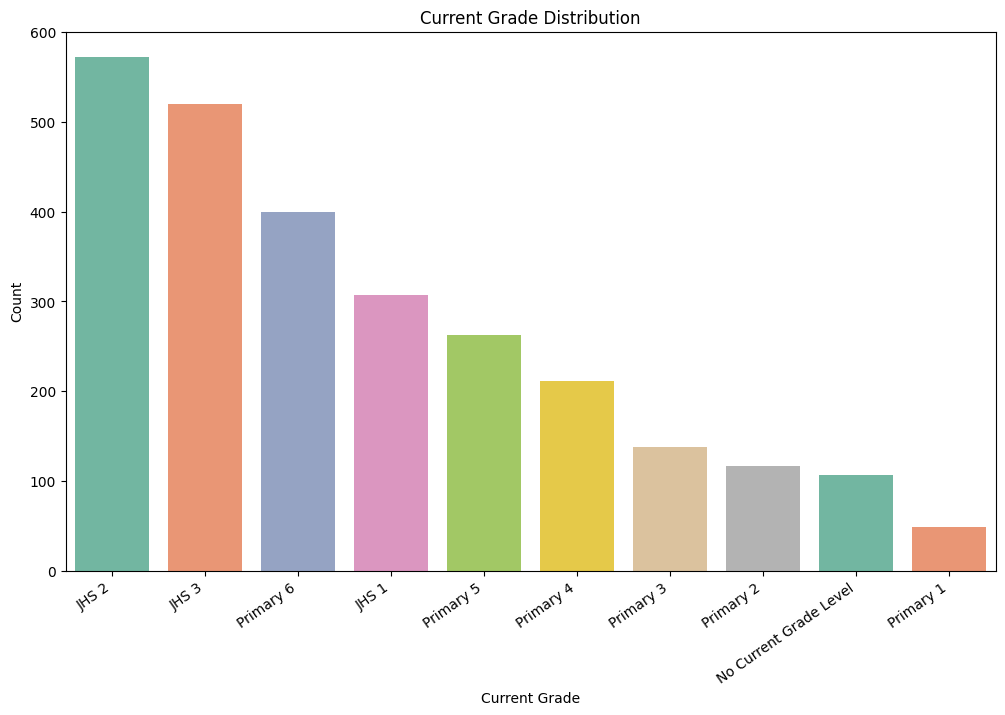

In [163]:
palette = sns.color_palette("Set2",n_colors=len(current_grade))
plt.figure(figsize=(12, 7))
sns.barplot(x=current_grade.index, y=current_grade.values,hue = current_grade.index, palette=palette)
plt.title("Current Grade Distribution")
plt.xlabel("Current Grade")
plt.ylabel("Count")
#plt.savefig('region_dis.png')
plt.xticks(rotation=35, ha='right')  # Rotate x-axis labels for readability
plt.show()

In [156]:
devices_used_online_studies = df["if_yes_what_type_of_device_do_you_use?"].value_counts()
devices_used_online_studies

if_yes_what_type_of_device_do_you_use?
No Answer           1687
Smartphone           679
Tablet               240
Laptop                59
Desktop Computer      17
Name: count, dtype: int64

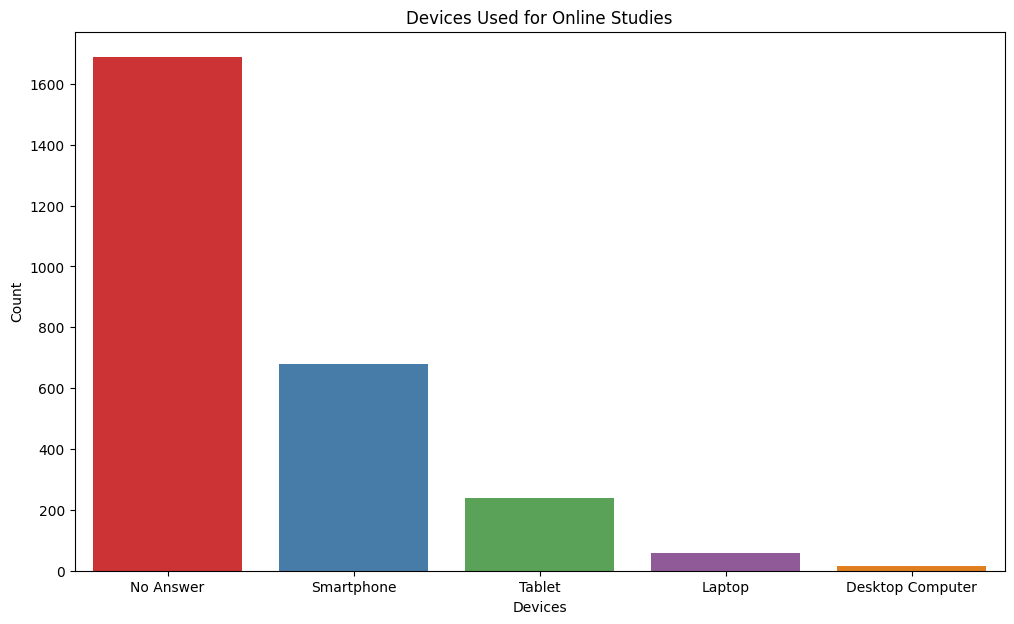

In [165]:
palette = sns.color_palette("Set1",n_colors=len(devices_used_online_studies))
plt.figure(figsize=(12, 7))
sns.barplot(x=devices_used_online_studies.index, y=devices_used_online_studies.values,hue = devices_used_online_studies.index, palette=palette)
plt.title("Devices Used for Online Studies")
plt.xlabel("Devices")
plt.ylabel("Count")
#plt.savefig('region_dis.png')
plt.show()

In [169]:
confi_devices = df["how_comfortable_are_you_with_using_digital_devices_for_Learning?"].value_counts()
confi_devices

how_comfortable_are_you_with_using_digital_devices_for_Learning?
Not Comfortable     911
Very Comfortable    585
Comfortable         577
Moderate            498
No Answer           111
Name: count, dtype: int64

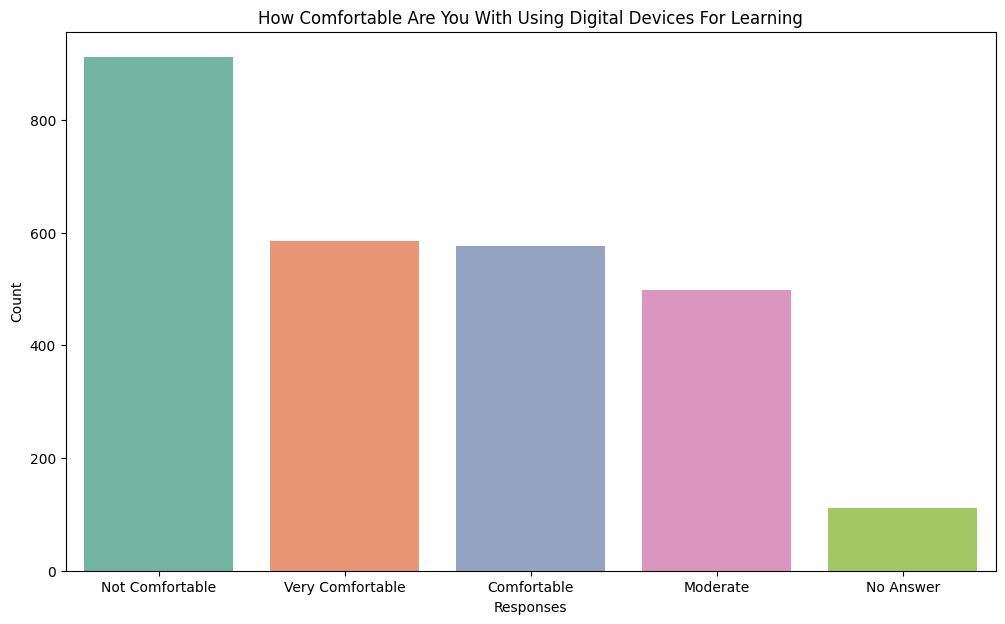

In [173]:
palette = sns.color_palette("Set2",n_colors=len(confi_devices))
plt.figure(figsize=(12, 7))
sns.barplot(x=confi_devices.index, y=confi_devices.values,hue = confi_devices.index, palette=palette)
plt.title("How Comfortable Are You With Using Digital Devices For Learning")
plt.xlabel("Responses")
plt.ylabel("Count")
#plt.savefig('region_dis.png')
plt.show()

In [176]:
internet_access = df["do_you_have_internet_access?"].value_counts()
internet_access

do_you_have_internet_access?
No           1531
Yes          1051
No Answer     100
Name: count, dtype: int64

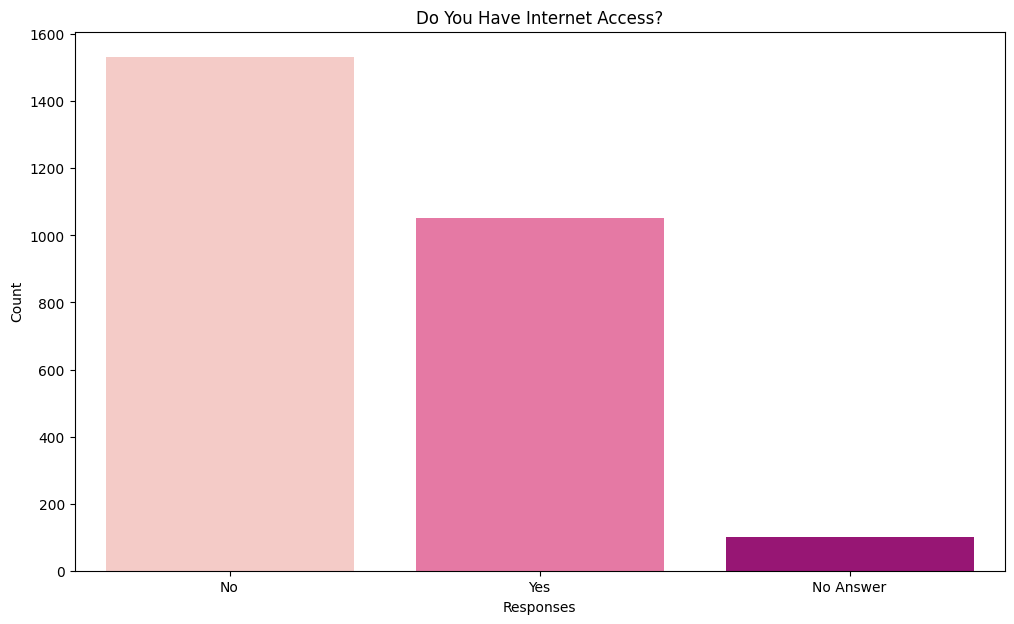

In [202]:
palette = sns.color_palette("RdPu",n_colors=len(internet_access))
plt.figure(figsize=(12, 7))
sns.barplot(x=internet_access.index, y=internet_access.values,hue = internet_access.index, palette=palette)
plt.title("Do You Have Internet Access?")
plt.xlabel("Responses")
plt.ylabel("Count")
#plt.savefig('region_dis.png')
plt.show()

In [182]:
if_yes_internet_access = df["if_yes_what_type_of_internet_access_do_you_use?"].value_counts()
if_yes_internet_access

if_yes_what_type_of_internet_access_do_you_use?
No Answer      1646
Mobile Data     826
Wi-Fi           204
Others            5
Broadband         1
Name: count, dtype: int64

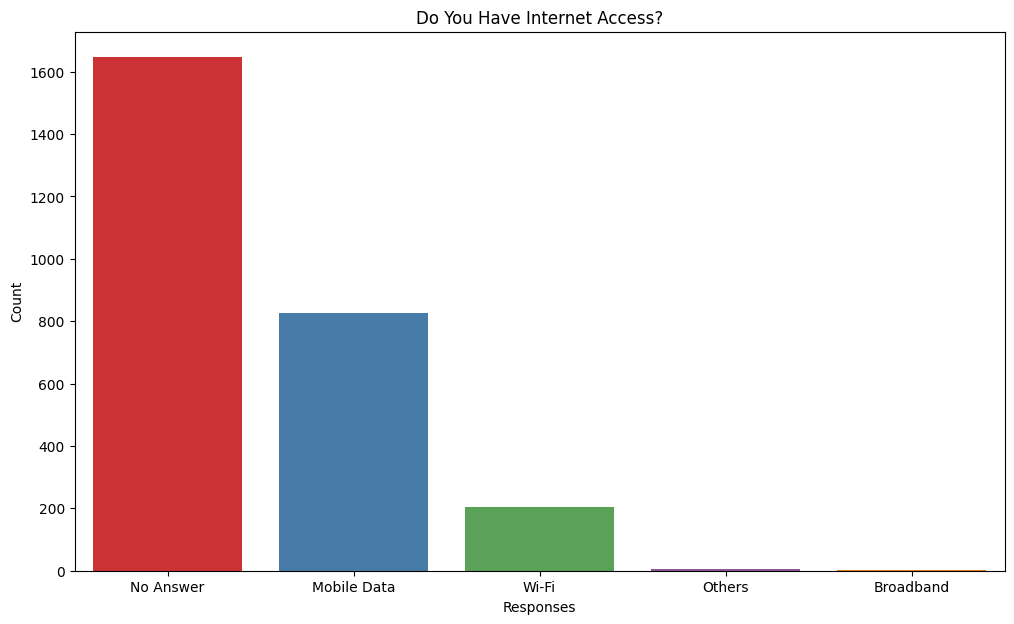

In [185]:
palette = sns.color_palette("Set1",n_colors=len(if_yes_internet_access))
plt.figure(figsize=(12, 7))
sns.barplot(x=if_yes_internet_access.index, y=if_yes_internet_access.values,hue = if_yes_internet_access.index, palette=palette)
plt.title("Do You Have Internet Access?")
plt.xlabel("Responses")
plt.ylabel("Count")
#plt.savefig('region_dis.png')
plt.show()

In [189]:
internet_to_access_information = df["how_comfortable_are_you_using_the_internet_to_access_information?"].value_counts()
internet_to_access_information

how_comfortable_are_you_using_the_internet_to_access_information?
Not Comfortable     932
Comfortable         580
Very Comfortable    539
Moderate            523
No Answer           108
Name: count, dtype: int64

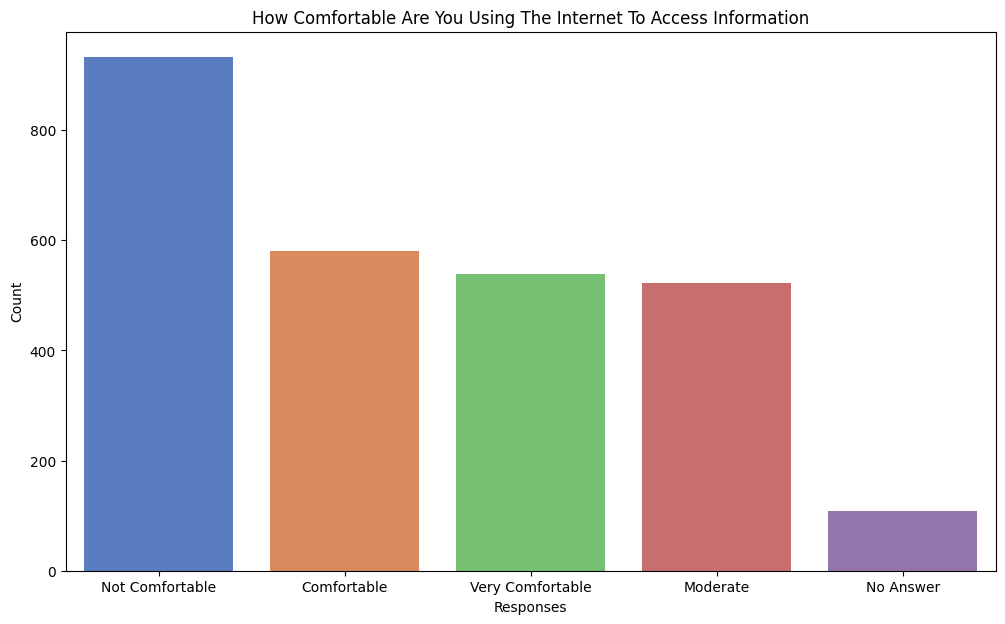

In [201]:
palette = sns.color_palette("muted",n_colors=len(internet_to_access_information))
plt.figure(figsize=(12, 7))
sns.barplot(x=internet_to_access_information.index, y=internet_to_access_information.values,hue = internet_to_access_information.index, palette=palette)
plt.title("How Comfortable Are You Using The Internet To Access Information")
plt.xlabel("Responses")
plt.ylabel("Count")
#plt.savefig('region_dis.png')
plt.show()

In [197]:
preferred_learning_style = df["what_is_your_preferred_learning_style?"].value_counts()
preferred_learning_style

what_is_your_preferred_learning_style?
Visual (videos, diagrams)            1302
Kinesthetic (hands-on activities)     638
Auditory (lectures, discussions)      623
No Answer                             119
Name: count, dtype: int64

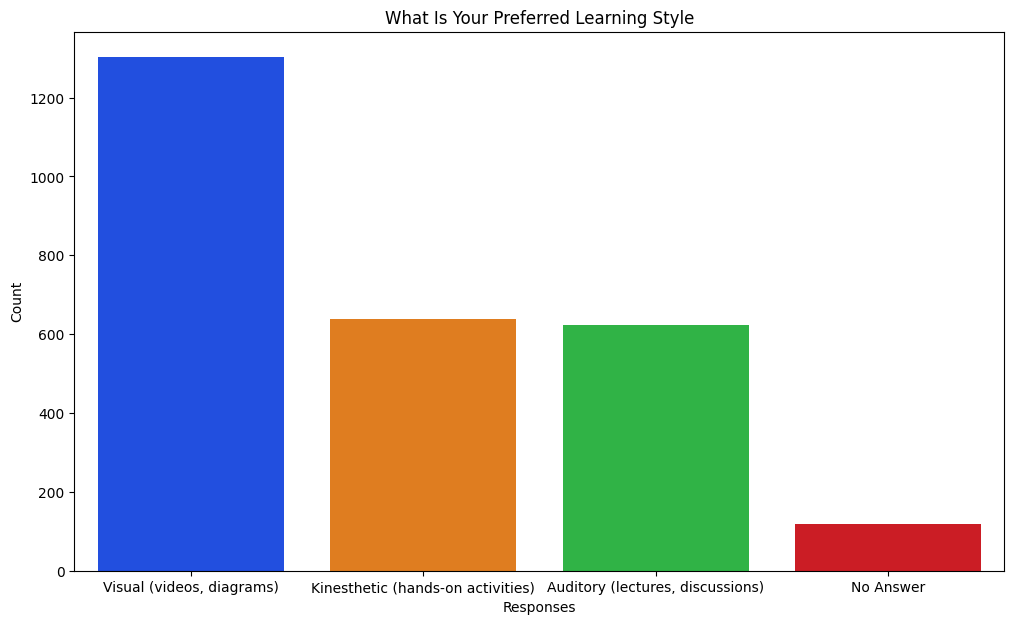

In [204]:
palette = sns.color_palette("bright",n_colors=len(preferred_learning_style))
plt.figure(figsize=(12, 7))
sns.barplot(x=preferred_learning_style.index, y=preferred_learning_style.values,hue = preferred_learning_style.index, palette=palette)
plt.title("What Is Your Preferred Learning Style")
plt.xlabel("Responses")
plt.ylabel("Count")
#plt.savefig('region_dis.png')
plt.show()

In [228]:
df.columns

Index(['name', 'age', 'gender', 'contact', 'name of School',
       'current_grade_level', 'region_of_School',
       'do_you_have_access_to_a_device_for_online_Learning?',
       'if_yes_what_type_of_device_do_you_use?',
       'how_comfortable_are_you_with_using_digital_devices_for_Learning?',
       'do_you_have_internet_access?',
       'if_yes_what_type_of_internet_access_do_you_use?', 'Others specify',
       'how_comfortable_are_you_using_the_internet_to_access_information?',
       'what_is_your_preferred_learning_style?',
       'have_you_used_an_online_learning_platform_before?',
       'if_yes_please_specify',
       'what_is_your_level_of_experience_with_online_remote_learning_platforms?',
       'what_are_the_main_challenges_you_have_faced_or_expect_to_face_with_online_learning?',
       'if_others_please_specify',
       'what_kind_of_support_would_you_find_most_helpful_in_transitioning_to_technology_enabled_learning?',
       'if_others_please_specify_1',
       'have_yo

**Male Preferred Learning Styles:**
what_is_your_preferred_learning_style?
Visual (videos, diagrams)            135
Auditory (lectures, discussions)      59
Kinesthetic (hands-on activities)     35
No Answer                              1
Name: count, dtype: int64

**Female Preferred Learning Styles:**
what_is_your_preferred_learning_style?
Visual (videos, diagrams)            87
Auditory (lectures, discussions)     53
Kinesthetic (hands-on activities)    47
No Answer                             4
Name: count, dtype: int64


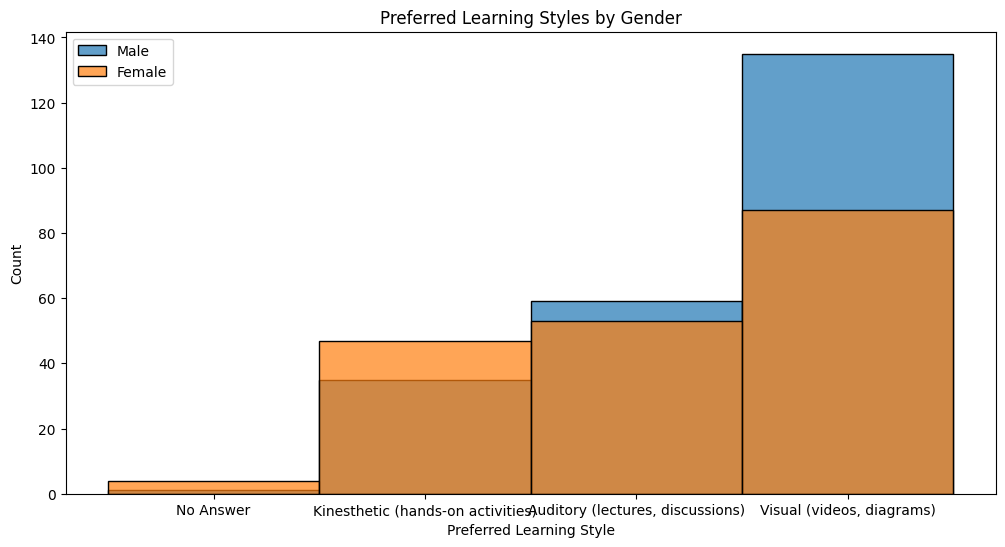

In [230]:
df_filtered = df[df['have_you_used_an_online_learning_platform_before?'] == 'Yes']

df_male = df_filtered[df_filtered['gender'] == 'Male']
df_female = df_filtered[df_filtered['gender'] == 'Female']

# Count preferred learning styles for males and females
male_counts = df_filtered[df_filtered['gender'] == 'Male']['what_is_your_preferred_learning_style?'].value_counts()
female_counts = df_filtered[df_filtered['gender'] == 'Female']['what_is_your_preferred_learning_style?'].value_counts()

# Print value counts for both genders
print("**Male Preferred Learning Styles:**")
print(male_counts)

print("\n**Female Preferred Learning Styles:**")
print(female_counts)

plt.figure(figsize=(12, 6))
sns.histplot(df_male['what_is_your_preferred_learning_style?'], bins=20, alpha=0.7, label='Male')
sns.histplot(df_female['what_is_your_preferred_learning_style?'], bins=20, alpha=0.7, label='Female')
plt.title("Preferred Learning Styles by Gender")
plt.xlabel("Preferred Learning Style")
plt.ylabel("Count")
plt.legend()
#plt.savefig("learning_style.png")
plt.show()

In [207]:
learning_platform_before = df["have_you_used_an_online_learning_platform_before?"].value_counts()
learning_platform_before

have_you_used_an_online_learning_platform_before?
No           2161
Yes           431
No Answer      90
Name: count, dtype: int64

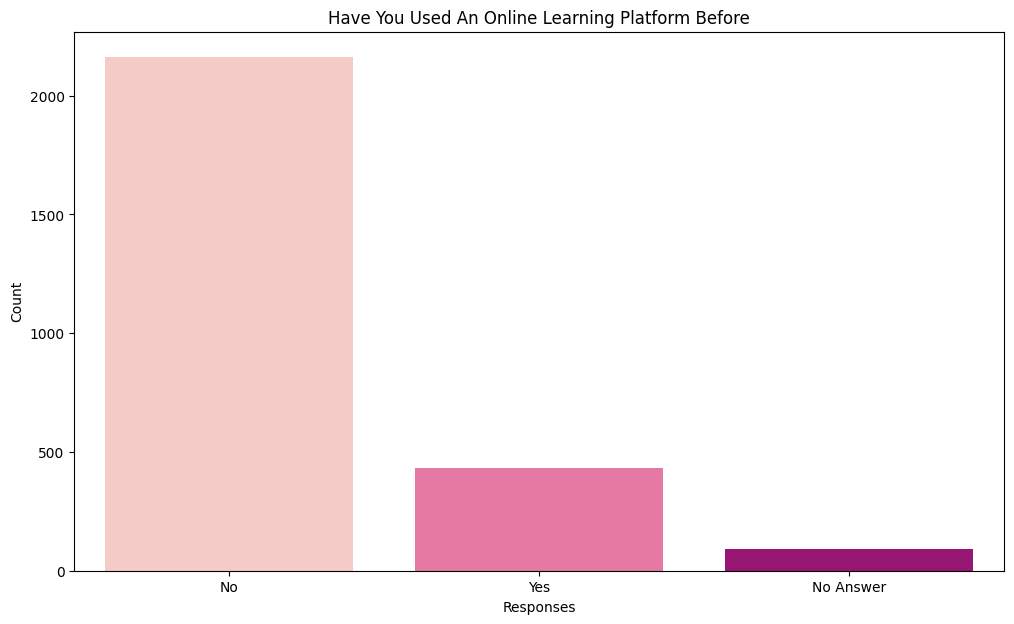

In [212]:
palette = sns.color_palette("RdPu",n_colors=len(learning_platform_before))
plt.figure(figsize=(12, 7))
sns.barplot(x=learning_platform_before.index, y=learning_platform_before.values,hue = learning_platform_before.index, palette=palette)
plt.title("Have You Used An Online Learning Platform Before")
plt.xlabel("Responses")
plt.ylabel("Count")
#plt.savefig('region_dis.png')
plt.show()

In [221]:
experience_with_online = df["what_is_your_level_of_experience_with_online_remote_learning_platforms?"].value_counts()
experience_with_online

what_is_your_level_of_experience_with_online_remote_learning_platforms?
No experience           1620
Some experience          748
Extensive experience     220
No Answer                 94
Name: count, dtype: int64

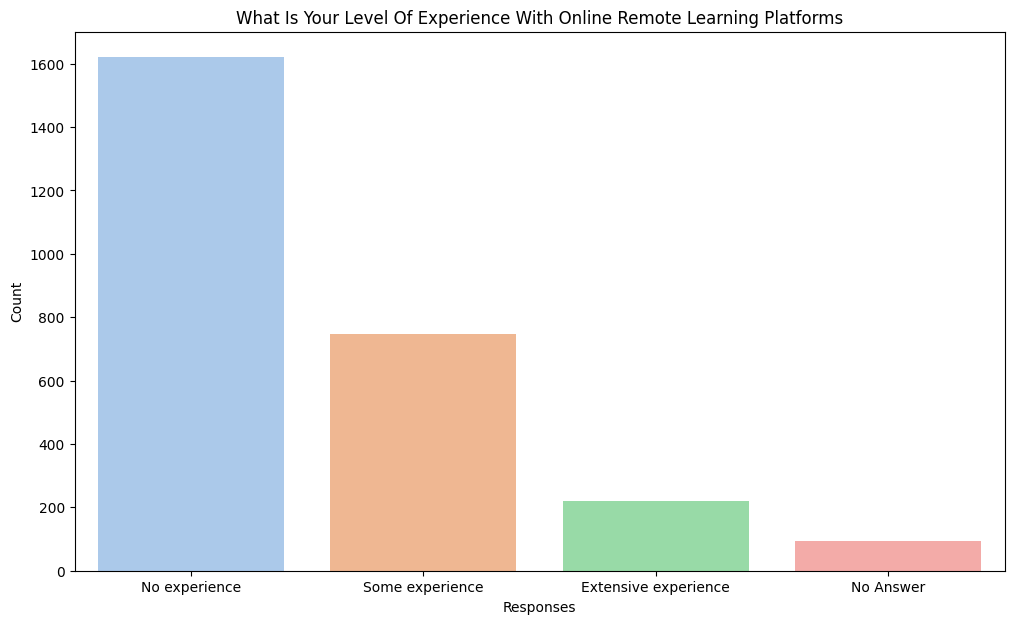

In [225]:
palette = sns.color_palette("pastel",n_colors=len(experience_with_online))
plt.figure(figsize=(12, 7))
sns.barplot(x=experience_with_online.index, y=experience_with_online.values,hue = experience_with_online.index, palette=palette)
plt.title("What Is Your Level Of Experience With Online Remote Learning Platforms")
plt.xlabel("Responses")
plt.ylabel("Count")
#plt.savefig('region_dis.png')
plt.show()

In [233]:
main_challenges = df["what_are_the_main_challenges_you_have_faced_or_expect_to_face_with_online_learning?"].value_counts()
main_challenges

what_are_the_main_challenges_you_have_faced_or_expect_to_face_with_online_learning?
Lack of access to reliable internet/devices              1710
Balancing schoolwork with other responsibilities          277
Difficulty staying engaged and motivated                  235
Inability to receive immediate feedback from teachers     167
Feeling isolated from classmates                          123
No Answer                                                 112
Others                                                     58
Name: count, dtype: int64

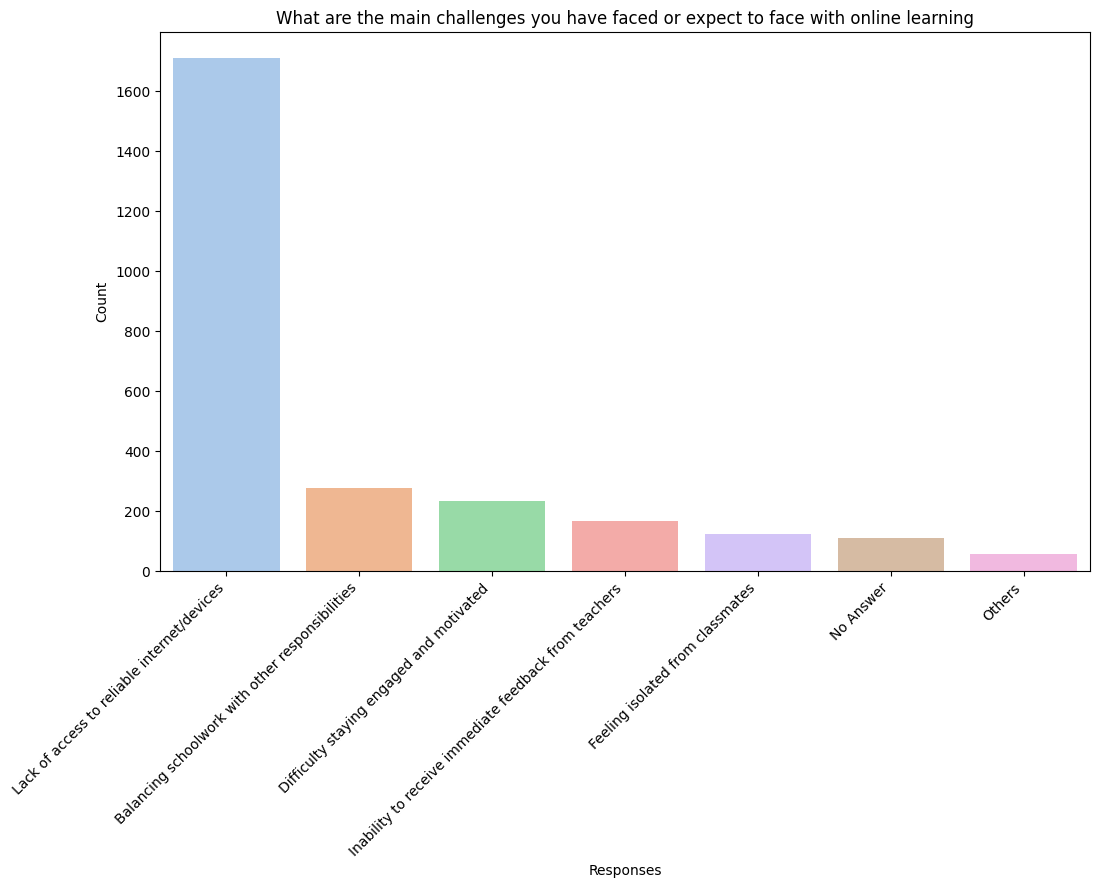

In [237]:
palette = sns.color_palette("pastel",n_colors=len(main_challenges))
plt.figure(figsize=(12, 7))
sns.barplot(x=main_challenges.index, y=main_challenges.values,hue = main_challenges.index, palette=palette)
plt.title("What are the main challenges you have faced or expect to face with online learning")
plt.xlabel("Responses")
plt.ylabel("Count")
#plt.savefig('region_dis.png')
plt.xticks(rotation=45, ha='right')
plt.show()

In [240]:
kind_of_support=df["what_kind_of_support_would_you_find_most_helpful_in_transitioning_to_technology_enabled_learning?"].value_counts()
kind_of_support

what_kind_of_support_would_you_find_most_helpful_in_transitioning_to_technology_enabled_learning?
Training on how to use online learning platforms                       1976
Opportunities for virtual peer collaboration and social interaction     161
Guidance on time management and balancing responsibilities              147
Tips for staying engaged and motivated in remote settings               142
Access to technical support and troubleshooting                         127
No Answer                                                               115
Others                                                                   14
Name: count, dtype: int64

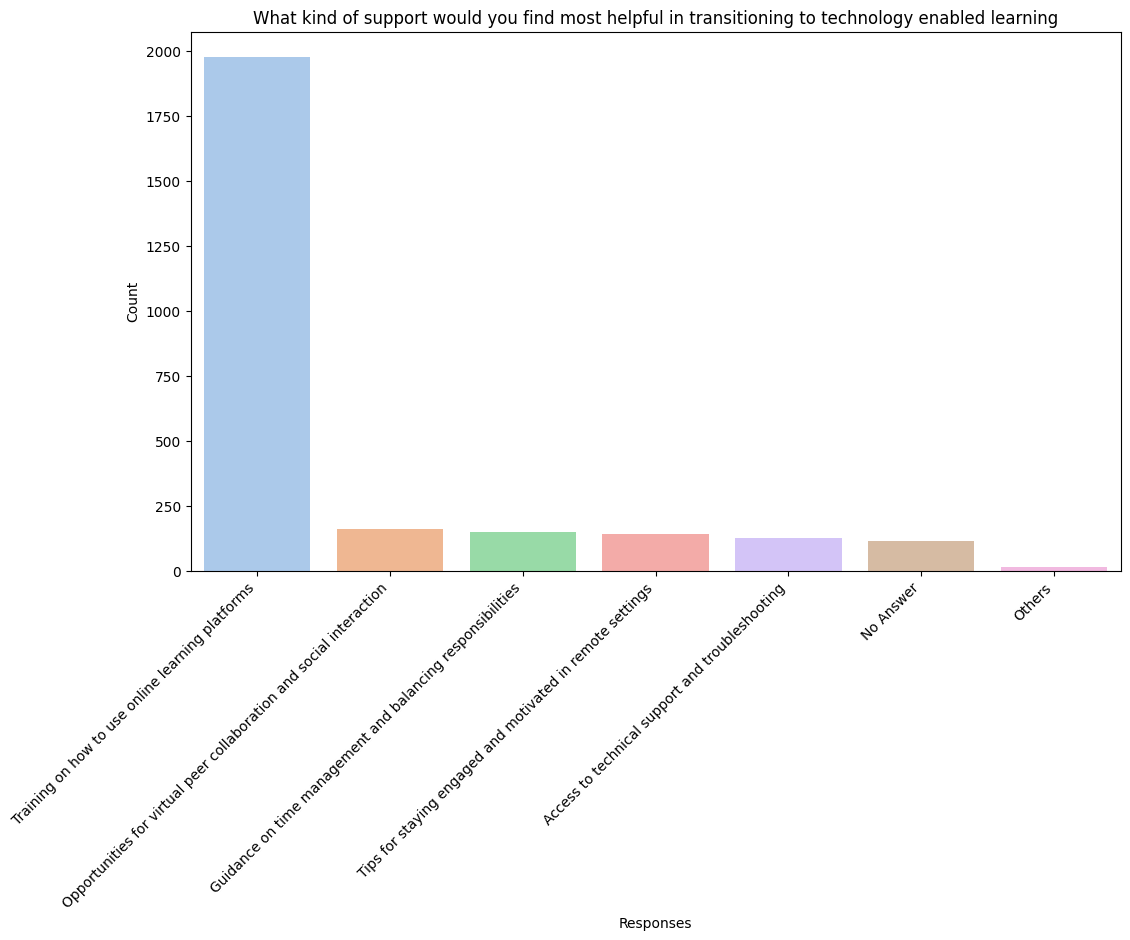

In [243]:
palette = sns.color_palette("pastel",n_colors=len(kind_of_support))
plt.figure(figsize=(12, 7))
sns.barplot(x=kind_of_support.index, y=kind_of_support.values,hue = kind_of_support.index, palette=palette)
plt.title("What kind of support would you find most helpful in transitioning to technology enabled learning")
plt.xlabel("Responses")
plt.ylabel("Count")
#plt.savefig('region_dis.png')
plt.xticks(rotation=45, ha='right')
plt.show()

In [245]:
eOSS_project_before=df["have_you_heard_about_the_TeOSS_project_before?"].value_counts()
eOSS_project_before

have_you_heard_about_the_TeOSS_project_before?
No           2255
Yes           342
No Answer      85
Name: count, dtype: int64

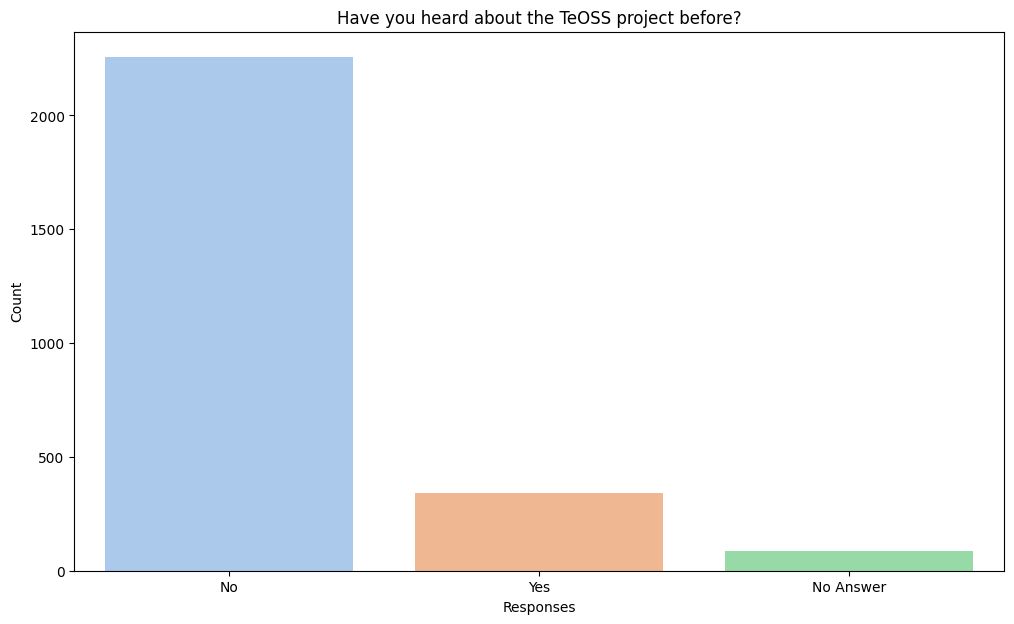

In [249]:
palette = sns.color_palette("pastel",n_colors=len(eOSS_project_before))
plt.figure(figsize=(12, 7))
sns.barplot(x=eOSS_project_before.index, y=eOSS_project_before.values,hue = eOSS_project_before.index, palette=palette)
plt.title("Have you heard about the TeOSS project before?")
plt.xlabel("Responses")
plt.ylabel("Count")
#plt.savefig('region_dis.png')
plt.show()

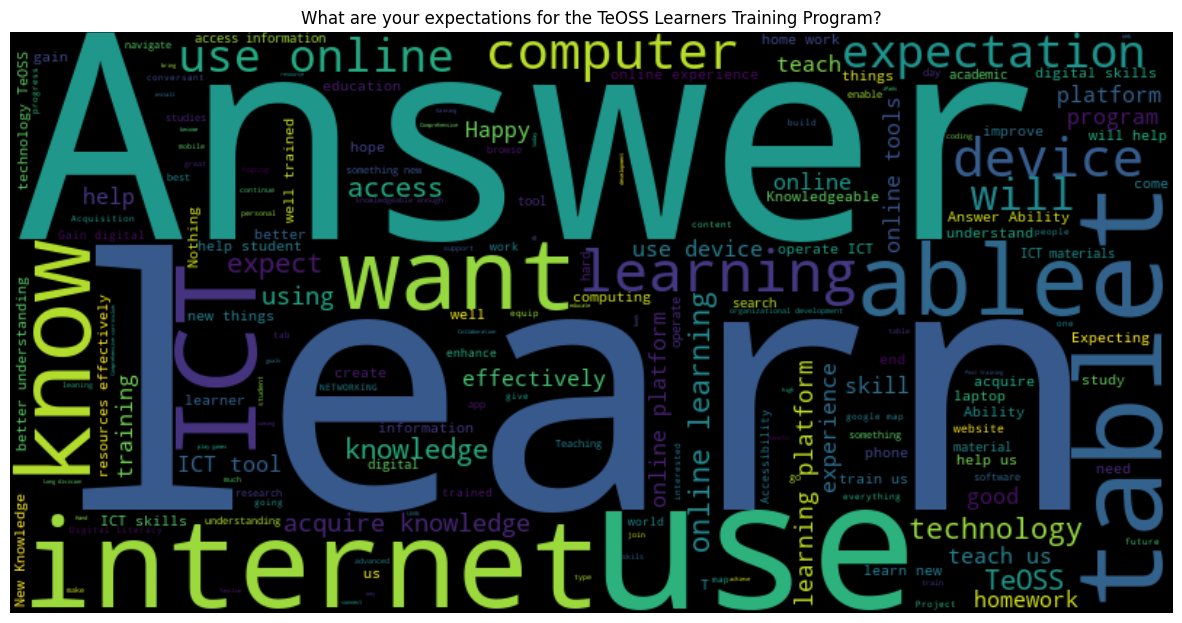

In [252]:
your_expectations = df["what_are_your_expectations_for_the_TeOSS_Learners_Training_Program?"]

# Join all responses into a single string
text = " ".join(your_expectations.dropna())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, random_state=40).generate(text)

# Plot the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("What are your expectations for the TeOSS Learners Training Program?")
plt.axis("off")
#plt.savefig("aspect_training.png")
plt.show()